In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('data_science_job.csv')

In [20]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [21]:
df.isnull().mean()*100
# percentage of data missing 


enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [22]:
df.shape

(19158, 13)

In [23]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [24]:
clas=[]
for vars in df.columns:
        # print(vars)
        if df[vars].isnull().mean() < 0.05 and df[vars].isnull().mean() > 0 :
                print(vars)
                clas.append(vars)
# print(clas)
df[clas].sample(5)

city_development_index
enrolled_university
education_level
experience
training_hours


,city_development_index,enrolled_university,education_level,experience,training_hours
11549,0.910,no_enrollment,Graduate,2.0,28.0
3864,0.920,no_enrollment,Masters,20.0,25.0
11621,0.920,Full time course,Phd,13.0,28.0
8837,0.802,no_enrollment,Masters,20.0,NaN
12368,0.624,Full time course,High School,2.0,26.0


In [25]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
8443,0.767,no_enrollment,NaN,3.0,9.0
15830,0.624,Full time course,Graduate,6.0,42.0
10852,0.767,no_enrollment,Graduate,20.0,48.0
8660,0.624,no_enrollment,Masters,0.0,35.0
4334,0.920,Full time course,Graduate,3.0,43.0


In [26]:
df['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [27]:
len(df[cols].dropna()) / len(df)

0.8968577095730244

In [28]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((19158, 13), (17182, 5))

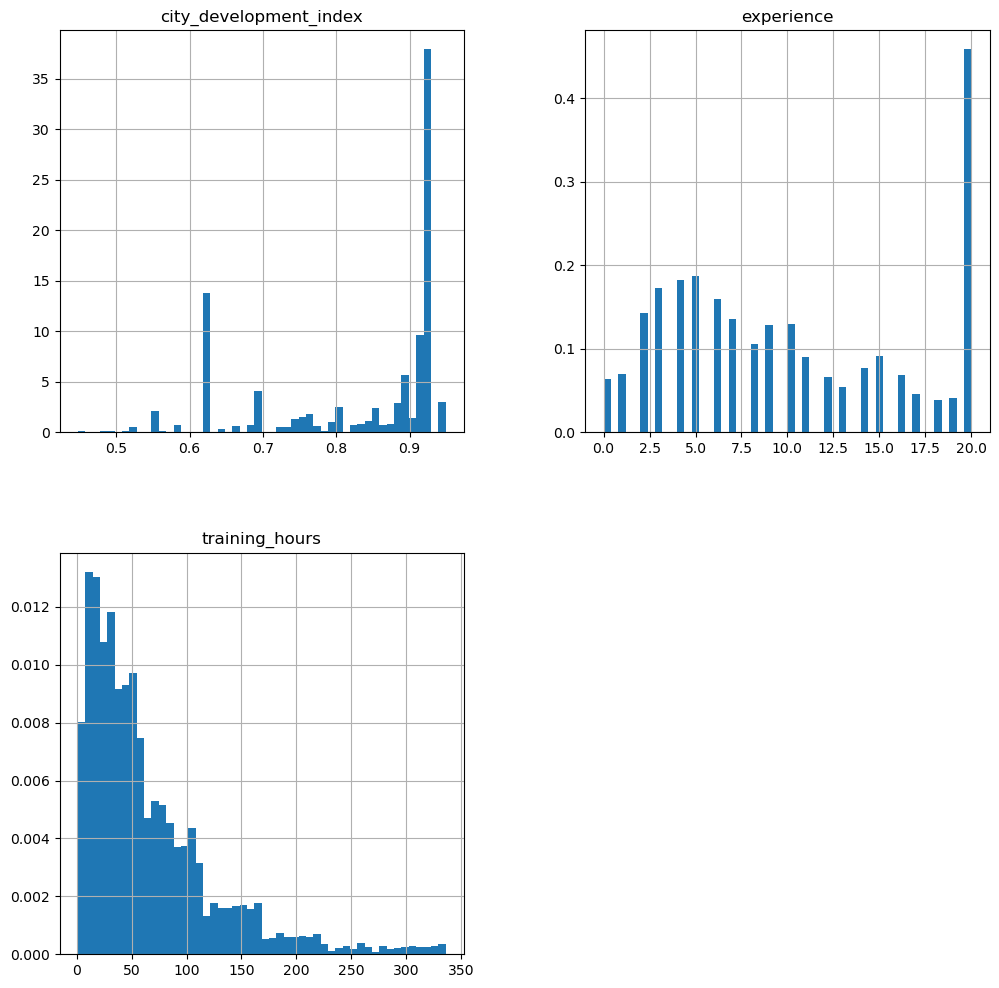

In [33]:
new_df.hist(bins=50, density=True, figsize=(12, 12))
plt.show()

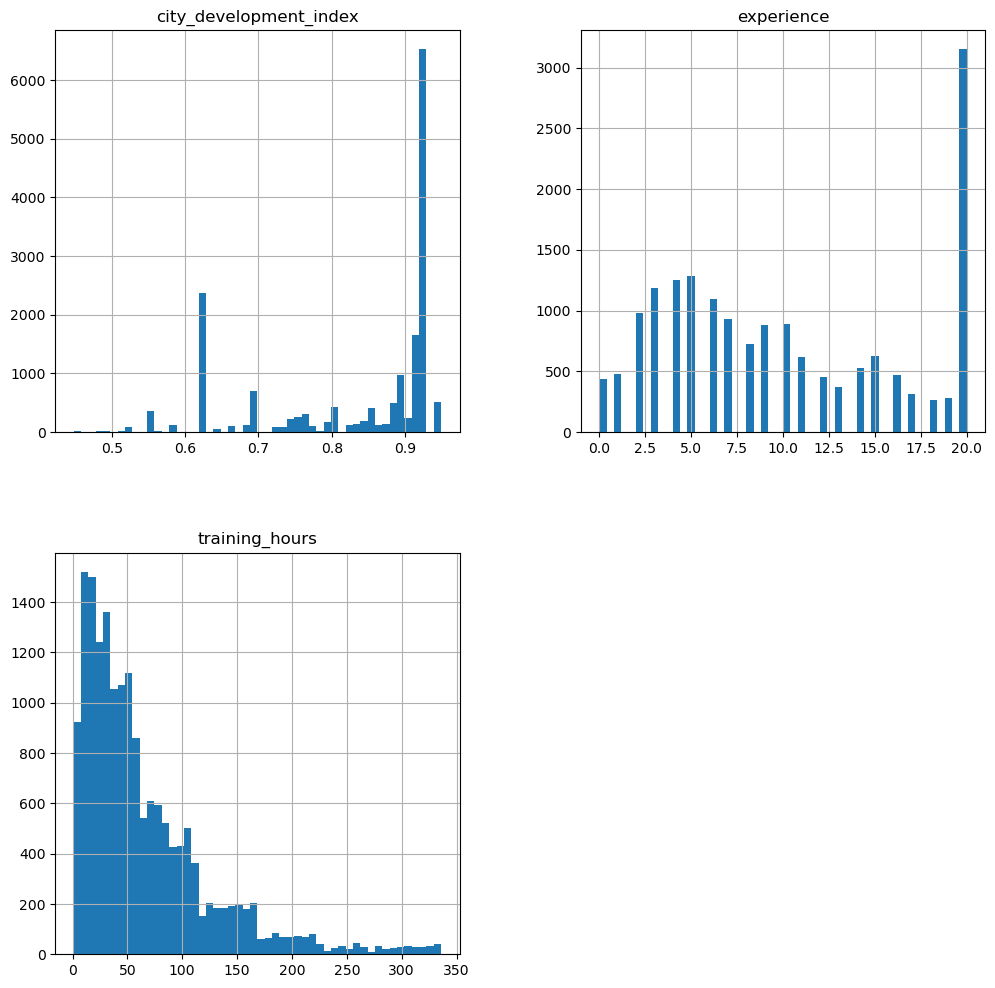

In [40]:
new_df.hist(bins=50, density=False, figsize=(12, 12))
plt.show()

<AxesSubplot:>

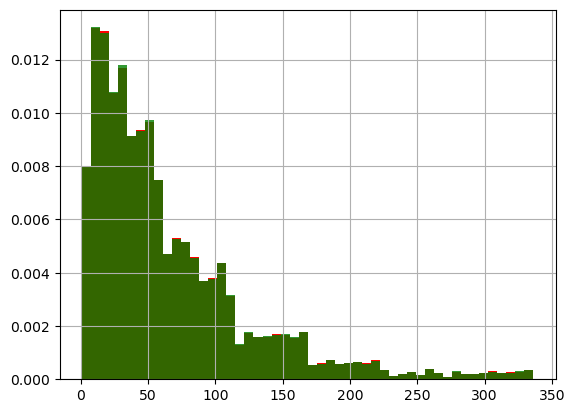

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<AxesSubplot:>

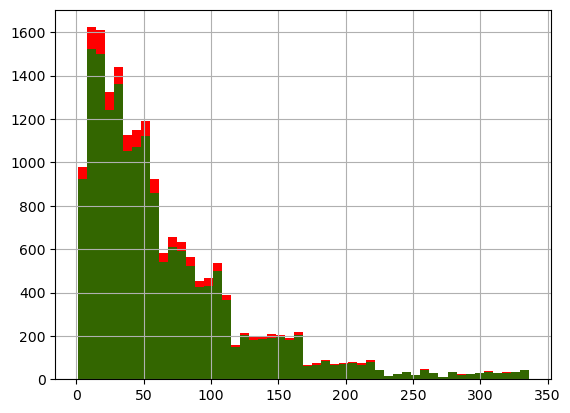

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=False, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=False, alpha=0.8)

<AxesSubplot:xlabel='training_hours', ylabel='Count'>

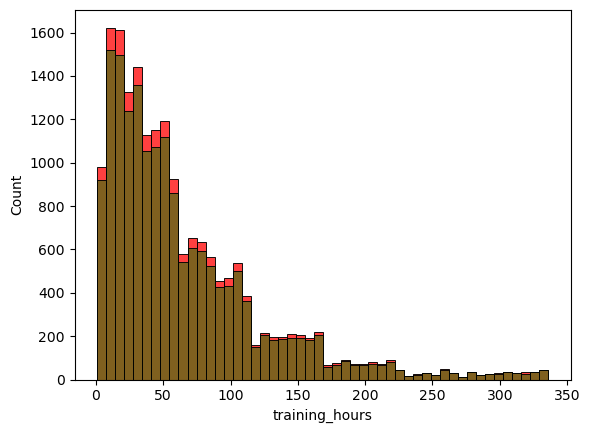

In [66]:
sns.histplot(df['training_hours'],color='r',bins=50)
sns.histplot(new_df['training_hours'],color='g',bins=50,alpha=0.5)

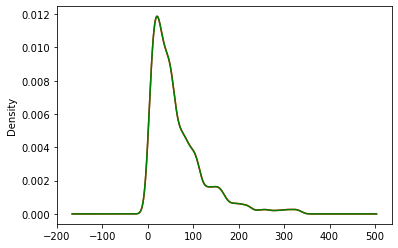

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

<AxesSubplot:xlabel='training_hours', ylabel='Density'>

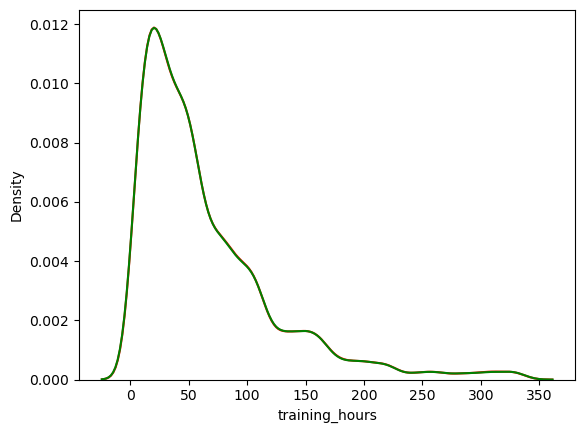

In [70]:
sns.kdeplot(df['training_hours'],color='r')
sns.kdeplot(new_df['training_hours'],color='g')

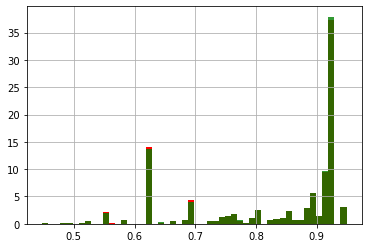

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['city_development_index'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

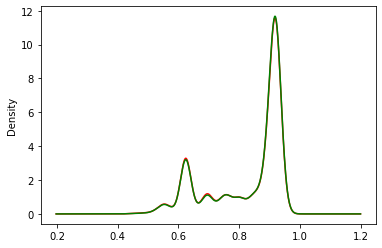

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['city_development_index'].plot.density(color='red')

# data after cca
new_df['city_development_index'].plot.density(color='green')

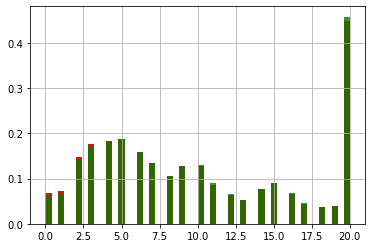

In [47]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

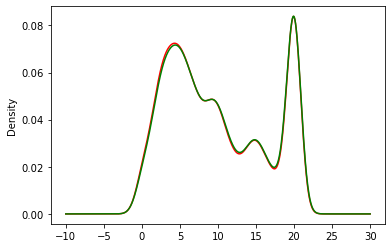

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [51]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [52]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
